In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating a sudoku grid with corresponding labels
# default value of a sudoku grid dimension is 3
def create_sudoku(n = 3):
    sudoku = []
    value = 0
    for i in range(pow(n, 2)):
        array = []
        for j in range(pow(n, 2)):
            array.append(value)
            value += 1
    
        sudoku.append(array)
        
    return sudoku

In [3]:
# generating pairs in a row based on a given grid
def generate_row_pairs(grid):
    row_pairs = []
    
    for row in grid: # loops through each row of the grid
        for col in range(len(row)): # loops through the columns of the row
            for cell in range(col, len(row)): # gets the cell of the grid to pair it up with other cells
                if col == cell: continue # skips indexes that are equal
                row_pairs.append([row[col], row[cell]]) # creates pairs 
    
    return row_pairs

In [4]:
# generating pairs in a column based on a given grid
def generate_col_pairs(grid):
    col_pairs = []
    
    for col in range(len(grid)): # loops through the length of the dimensions of the grid
        for row in range(len(grid)): # loops through the row of the grid
            for cell in range(row, len(grid)): # gets the cell of the grid to pair it up with other cells
                if row == cell: continue # skips indexes that are equal
                col_pairs.append([grid[row][col], grid[cell][col]]) # creates pairs
    
    return col_pairs

In [5]:
def generate_pairs(grid, n):
    dim = len(grid) # dimension size (n ^ 4)
    n = n # just n :3
    pairs = [] # a list that will contain all of the pairs
    
    col_idx = 0 # for box pairing: tracks the column
    row_idx = 0 # for box pairing: tracks the row
    
    # generates row pairs
    pairs.extend(generate_row_pairs(grid))
    
    # generates col pairs
    pairs.extend(generate_col_pairs(grid))
    
    # generates box pairs
    for box in range(pow(n, 2)):
        box_grid = [] # a list that will consist of the cells in a box
        for row in range(n): # loops through a row based on n
            for col in range(n): # loops through a column based on n
                box_grid.append(grid[row + row_idx][col + col_idx]) # appends all of the cells contained in the box
        pairs.extend(generate_row_pairs([box_grid])) # adds it to the pairs list
        
        if col_idx == pow(n, 2) - n: # checks if column tracker is at the end of the grid
            col_idx = 0 # resets the column tracker's index
            row_idx += n # increments the row tracker based on n 
            continue # skips the rest of the code

        col_idx += n # only runs if the column tracker hasn't reached the end
    
    return pairs # returns a list containing all of the pairs

In [6]:
def generate_sudoku(n = 3):
    sudoku_grid = create_sudoku(n = n) # generates a sudoku grid (w/ labels)
    grid_cr_dim = pow(n, 2) # the sudoku's column and row size
    grid_dim = pow(n, 4) # the sudoku's dimension (n x n)
    
    g = nx.empty_graph(grid_dim) # creates a graph with no edges 
    
    pairs = generate_pairs(sudoku_grid, n) # generates pairs based on the grid and n
    
    g.add_edges_from(pairs) # adds edges to the nodes of the graph
    
    return g # returns the graph

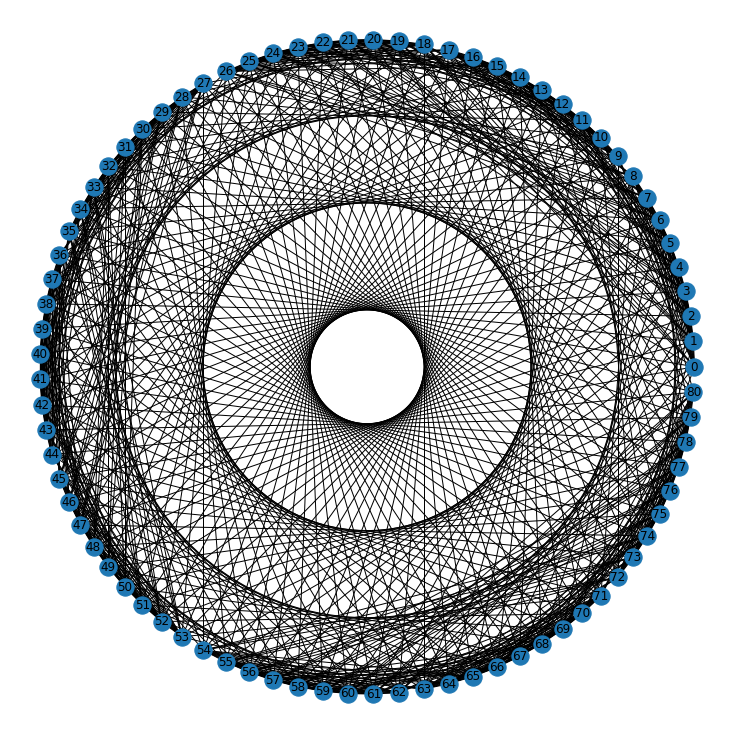

In [7]:
g_sudoku_2 = generate_sudoku(n = 3)
plt.figure(figsize = (10, 10))
nx.draw_circular(g_sudoku_2, with_labels = True)

In [8]:
sorted(g_sudoku_2.neighbors(1))

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 18, 19, 20, 28, 37, 46, 55, 64, 73]

In [102]:
# goals:
# create a function to check if a certain sudoku puzzle is correct
# or
# create a function to generate a sudoku puzzle
#
# note: utilize the neighbors() function of networkx to get the row,
#       column, and the box of the cell that it overlaps to
# (applies to both)

#def generate_sudoku_puzzle():
#    return

#def sudoku_checker():
#    return

# update:
# generating of sudoku puzzle isn't working yet 
# sudoku checker is working

In [200]:
# not working
import random
import copy

def generate_sudoku_puzzle(graph, n = 3):
    grid_dim = pow(n, 2)
    grid_label = dict()
    grid_values = list(range(1, grid_dim + 1))
    grid_tracker = 0
    grid = [[0 for i in range(grid_dim)] for y in range(grid_dim)]
    
    # generating a grid of 0s in an n x n dimension
    for i in range(graph.number_of_nodes()):
        value = random.choice(grid_values)
        grid_label[i] = 0
    
    # fixing the grid to be a sudoku puzzle
    solved = False
    while not solved:
        copy_grid = copy.deepcopy(grid_label)
        tracked_cells = random.sample(range(0, pow(n, 4)), pow(n, 4))
        inf_loop = 0
        counter = 0
        
        solved = False
        while not solved:
            for cell in tracked_cells:
                tried = []
                same = False
                values = [grid_label[x] for x in sorted(graph.neighbors(cell))]

                while True:
                    value = random.choice(grid_values)
                    if set(tried) == set(grid_values):
                        solved = False
                        break
                    if value not in values: 
                        grid_label[cell] = value
                        counter += 1
                        print(counter)
                        break
                    tried.append(value)
                
                for key in grid_label:
                    if grid_label[key] == 0:
                        print('not solved!')
                        counter = 0
                        break
                
    
    # transferring to a multi-dimensional array
    for row in grid:
        for col in row:
            col = grid_label[grid_tracker]
            print('{0} '.format(col), end = '')
            grid_tracker += 1
        print()
        
            
    
    return grid # returns a n x n sudoku puzzle

In [201]:
puzzle = generate_sudoku_puzzle(g_sudoku_2, 3)

#for row in range(9):
#    print('|', end = '')
#    for col in range(9):
#        print('| {0} |'.format(puzzle[row][col]), end = '')
#    print('|\n')
    
puzzle

1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not 

not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved

not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
no

1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
no

not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
no

not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
no

1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
no

1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved

not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1


1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved

1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
no

1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!


not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
1
not solved!
not solved!
not solved!
1
not solved!
1


KeyboardInterrupt: 

In [133]:
sudoku_test = [[5, 3, 4, 6, 7, 8, 9, 1, 2],
               [6, 7, 2, 1, 9, 5, 3, 4, 8],
               [1, 9, 8, 3, 4, 2, 5, 6, 7],
               [8, 5, 9, 7, 6, 1, 4, 2, 3],
               [4, 2, 6, 8, 5, 3, 7, 9, 1],
               [7, 1, 3, 9, 2, 4, 8, 5, 6],
               [9, 6, 1, 5, 3, 7, 2, 8, 4],
               [2, 8, 7, 4, 1, 9, 6, 3, 5],
               [3, 4, 5, 2, 8, 6, 1, 7, 9]]

In [131]:
# working

def sudoku_checker(graph, filled_in, n):
    grid_dim = pow(n, 2)
    grid_label = dict()
    row_tracker = 0
    col_tracker = 0
    grid_tracker = 0
    grid = [[0 for i in range(grid_dim)] for y in range(grid_dim)]
    result = False
    
    # labeling the filled-in sudoku
    for node in range(graph.number_of_nodes()):
        grid_label[node] = filled_in[row_tracker][col_tracker]
        
        if col_tracker == 8:
            row_tracker += 1
            col_tracker = 0
        else: col_tracker += 1
    
    # check the neighbors
    for node in range(graph.number_of_nodes()):
        print('Cell {0}: {1}'.format(node, grid_label[node]))
        print([grid_label[x] for x in sorted(graph.neighbors(node))])
        neighbors = [grid_label[x] for x in sorted(graph.neighbors(node))]
        
        if grid_label[node] not in neighbors:
            result = True
        if grid_label[node] in neighbors:
            result = False
            break
    
    # transferring into a multi-dimensional array
    for row in grid:
        for col in row:
            col = grid_label[grid_tracker]
            print('{0} '.format(col), end = '')
            grid_tracker += 1
        print()
    
    return result

In [135]:
if sudoku_checker(g_sudoku_2, sudoku_test, 3):
    print('Correct')

Cell 0: 5
[3, 4, 6, 7, 8, 9, 1, 2, 6, 7, 2, 1, 9, 8, 8, 4, 7, 9, 2, 3]
Cell 1: 3
[5, 4, 6, 7, 8, 9, 1, 2, 6, 7, 2, 1, 9, 8, 5, 2, 1, 6, 8, 4]
Cell 2: 4
[5, 3, 6, 7, 8, 9, 1, 2, 6, 7, 2, 1, 9, 8, 9, 6, 3, 1, 7, 5]
Cell 3: 6
[5, 3, 4, 7, 8, 9, 1, 2, 1, 9, 5, 3, 4, 2, 7, 8, 9, 5, 4, 2]
Cell 4: 7
[5, 3, 4, 6, 8, 9, 1, 2, 1, 9, 5, 3, 4, 2, 6, 5, 2, 3, 1, 8]
Cell 5: 8
[5, 3, 4, 6, 7, 9, 1, 2, 1, 9, 5, 3, 4, 2, 1, 3, 4, 7, 9, 6]
Cell 6: 9
[5, 3, 4, 6, 7, 8, 1, 2, 3, 4, 8, 5, 6, 7, 4, 7, 8, 2, 6, 1]
Cell 7: 1
[5, 3, 4, 6, 7, 8, 9, 2, 3, 4, 8, 5, 6, 7, 2, 9, 5, 8, 3, 7]
Cell 8: 2
[5, 3, 4, 6, 7, 8, 9, 1, 3, 4, 8, 5, 6, 7, 3, 1, 6, 4, 5, 9]
Cell 9: 6
[5, 3, 4, 7, 2, 1, 9, 5, 3, 4, 8, 1, 9, 8, 8, 4, 7, 9, 2, 3]
Cell 10: 7
[5, 3, 4, 6, 2, 1, 9, 5, 3, 4, 8, 1, 9, 8, 5, 2, 1, 6, 8, 4]
Cell 11: 2
[5, 3, 4, 6, 7, 1, 9, 5, 3, 4, 8, 1, 9, 8, 9, 6, 3, 1, 7, 5]
Cell 12: 1
[6, 7, 8, 6, 7, 2, 9, 5, 3, 4, 8, 3, 4, 2, 7, 8, 9, 5, 4, 2]
Cell 13: 9
[6, 7, 8, 6, 7, 2, 1, 5, 3, 4, 8, 3, 4, 2, 6, 5, 2, 3, 1, 8]
Ce